# Missing Data Imputation 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.preprocessing import scale
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression

import pandas as pd
from pathlib import Path

from random import sample

import scipy.stats as st

## Data loading

The dataset that we will use is named `data-lab2.csv`.

* Import the dataset using pandas
* Describe statistically the different variables available 
* Print the total % of missing data over the data
* Print the % of missing data per variable

In [2]:
data_path = Path("D:\Portofolio Data science\EDA\data-lab2.csv")

In [3]:
df = pd.read_csv(data_path, index_col = 0 )

In [4]:
df.head()

,sex,race,educ_r,r_age,workmos,welfare,charity,ssi,earnings,police
1,1,1.0,4.0,29.0,12,0,0,0,84.0,0.0
2,2,3.0,4.0,40.0,12,0,0,0,NaN,1.0
3,1,3.0,2.0,36.0,10,0,0,0,27.5,0.0
4,1,1.0,4.0,71.0,11,0,0,0,85.0,1.0
5,1,4.0,4.0,30.0,12,0,0,0,135.0,1.0


In [5]:
df.describe()

,sex,race,educ_r,r_age,workmos,welfare,charity,ssi,earnings,police
count,1501.000000,1464.000000,1488.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1250.000000,1433.000000
mean,1.638241,2.161202,2.748656,41.324232,8.985343,104.702865,26.553631,208.332445,52.605431,0.658060
std,0.480670,0.983096,1.070481,14.842529,4.710391,715.051813,435.719940,1181.816203,124.674340,0.474525
min,1.000000,1.000000,1.000000,18.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,30.000000,7.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,2.000000,2.000000,3.000000,39.000000,12.000000,0.000000,0.000000,0.000000,28.000000,1.000000
75%,2.000000,3.000000,4.000000,50.000000,12.000000,0.000000,0.000000,0.000000,65.000000,1.000000
max,2.000000,4.000000,4.000000,97.000000,12.000000,10800.000000,10800.000000,13500.000000,3250.000000,1.000000


## Comment
We have some variables (ssi, police, ...) normaly qualitative but python treat them as quantitative. 
It's not a problem untilo now. 

## Simple imputation strategies 

Let us consider the case of imputing the **earnings** variable  in this dataset. 

* Plot the distribution of the earnings variables with a histogram
* Describe what the function bellow is doing 
* Use the function to impute the missing variable earnings 
* Compare the distributions of the newly imputed variable and the previous one

In [6]:
earnings = df["earnings"]

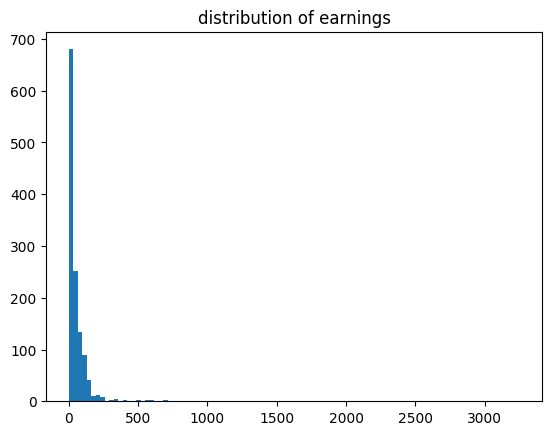

In [7]:
fig = plt.figure()
ax = fig.add_subplot()
plt.title ("distribution of earnings")
plt.hist(earnings, bins = 100)
plt.show()

In [8]:
# The next code will replace the NA values on a variable by a sample of random values
def random_imp(a):
    missing = a.isna()
    obs = a[-missing]
    imputed = np.array(a)
    n_miss = np.sum(missing)
    impute_values = sample(list(obs), n_miss)
    imputed[missing]=impute_values
    return imputed

In [9]:
earnings_after_imputation = random_imp(earnings)

In [10]:
earnings_after_imputation = pd.Series(earnings_after_imputation)

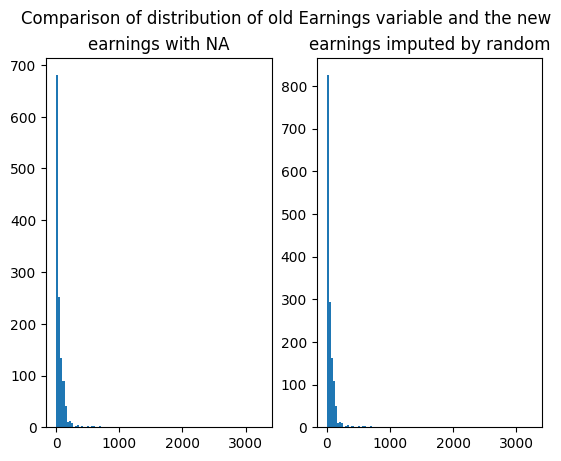

In [11]:
# Comparison of distribution of old "Earnings variable" and the new
fig = plt.figure()
plt.suptitle("Comparison of distribution of old Earnings variable and the new")
ax1 = fig.add_subplot(1,2,1)
plt.hist(earnings, bins = 100)
plt.title("earnings with NA")
ax2 = fig.add_subplot(1,2,2)
plt.hist(earnings_after_imputation, bins = 100)
plt.title("earnings imputed by random")
plt.show()

* What are the problems with this approach ? 
* Propose two simple alternatives and compare the obtained results 
* Create a function that encapsulate all three alternatives for imputing a variable. The choice of the strategy is a parameter of the function.

The main problem is the imputation doesn't reflect the relationship between earnings and other characteristics of the person.
It can alson change the distribution of variable. 
The two alternative way to impute Missing Values are : 
- Imputation by the median ;
- Imputation with mean.

In [12]:
# Method 1 : manual
def imputation_variable (a, strategy): 
    missing = a.isna()
    n_miss = np.sum(missing)
    obs = a[~missing]
    imputed = np.array(a)
    if strategy == 'mean' : 
        imputed_values = np.mean(obs)
        imputed[missing] = imputed_values
    elif strategy == 'median' :
        imputed_values = np.median(obs)
        imputed[missing] = imputed_values
    elif strategy == 'random' : 
        impute_values = sample(list(obs), n_miss)
        imputed[missing]=impute_values
    return imputed

In [13]:
earnings_after_imputation_mean = imputation_variable(earnings, "mean")
print(earnings_after_imputation_mean)
earnings_after_imputation_median = imputation_variable(earnings, "median")
earnings_after_imputation_random = imputation_variable(earnings, "random")

[ 84.         52.6054312  27.5       ... 510.         26.4
  82.       ]


In [14]:
a = np.arange(6)
print(a)
a = a.reshape(3,2)
print(a, a.ndim)

[0 1 2 3 4 5]
[[0 1]
 [2 3]
 [4 5]] 2


In [15]:
# Method 2 : using SimpleImputer
def imputation_variable_simple (a, strategy) : 
    a = np.array(a).reshape(-1,1) # Numpy search the number of row
    imp = SimpleImputer(missing_values = np.nan, strategy = strategy)
    imputed = imp.fit_transform(a)
    return imputed

In [16]:
earnings_after_imputation_mean_simple = imputation_variable_simple(earnings, "mean")

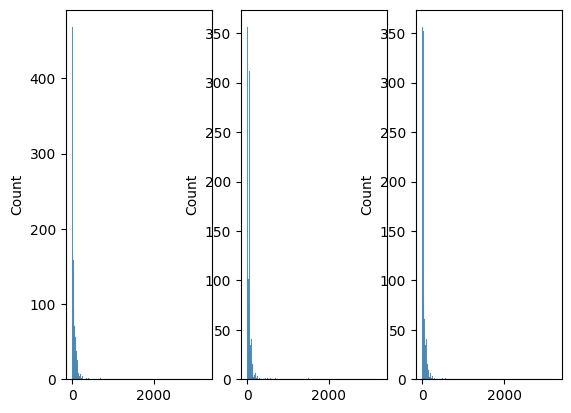

In [17]:
# Let's compare the three solutions
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
sns.histplot(earnings_after_imputation_random)
ax2 = fig.add_subplot(1,3,2)
sns.histplot(earnings_after_imputation_mean)
ax3 = fig.add_subplot(1,3,3)
sns.histplot(earnings_after_imputation_median)
plt.show()

## Trying some logical rules 

* Create a column in the data frame that indicated missingness in the earning variable 
* Check for the correlation between this new variable and the other one in the dataset 
* Can you propose a simple logical rule to impute some of the missing values based on the workmos variable?

In [18]:
# Creation of dummy variable
df['earnings_dummy'] = np.nan

In [19]:
df["earnings"]

1        84.0
2         NaN
3        27.5
4        85.0
5       135.0
        ...  
1497     21.6
1498      NaN
1499    510.0
1500     26.4
1501     82.0
Name: earnings, Length: 1501, dtype: float64

In [20]:
df["earnings"].isna()

1       False
2        True
3       False
4       False
5       False
        ...  
1497    False
1498     True
1499    False
1500    False
1501    False
Name: earnings, Length: 1501, dtype: bool

In [21]:
earnings_dummy = []
for i in earnings.isna() : 
    if i == True : 
        earnings_dummy.append(1)
    else :
        earnings_dummy.append(0)

In [22]:
# Or (tolist() to transform into list)
earnings_dummy = earnings.isna().astype(int).tolist()

In [23]:
earnings_dummy[:5]

[0, 1, 0, 0, 0]

In [24]:
df['earnings_dummy'] = earnings_dummy

In [25]:
df.head()

,sex,race,educ_r,r_age,workmos,welfare,charity,ssi,earnings,police,earnings_dummy
1,1,1.0,4.0,29.0,12,0,0,0,84.0,0.0,0
2,2,3.0,4.0,40.0,12,0,0,0,NaN,1.0,1
3,1,3.0,2.0,36.0,10,0,0,0,27.5,0.0,0
4,1,1.0,4.0,71.0,11,0,0,0,85.0,1.0,0
5,1,4.0,4.0,30.0,12,0,0,0,135.0,1.0,0


In [26]:
# Check the correlation between earnings_dummy and workmos
grouped_r_age = df.groupby('earnings_dummy')['workmos']
print(grouped_r_age)

In [27]:
group1 = grouped_r_age.get_group(1)
group0 = grouped_r_age.get_group(0)

In [28]:
f_stat, p_val = st.f_oneway(group0, group1)
print("F-statistic:", f_stat)
print("p-value:", p_val)

F-statistic: 26.818433922966626
p-value: 2.5383082781211145e-07


The mean of workmos for individuals with missing salary values is different from the mean of the other group. Therefore, it is possible to explain the missing values using workmos. This suggests that the missingness is of the type "Missing At Random" (MAR).

## Using Matching to impute missing values (deterministic)

* Implement a function that
 * for observations with NaN retrieve the top-k closest neighbors based on some distance 
 * impute the mean or the median earnings over the top-k closest neighbors
 
Parameters: k (default=3), distance (default=euclidean), strategy (default=mean)

* Impute the earnings variable and compare the results with previous imputation stragies

In [29]:
# Method 1 : manual
def matching_imputer(df, target_col='earnings', k=3, distance='euclidean', strategy='mean'):
    df = df.copy()

    # Séparer les lignes connues / manquantes
    missing = df[target_col].isna()
    df_missing = df[missing]
    df_known = df[~missing]

    # Normaliser les features (hors target)
    feature_cols = df.drop(columns=[target_col]).columns
    scaled_features = pd.DataFrame(scale(df[feature_cols]), columns=feature_cols, index=df.index)

    known_features = scaled_features.loc[~missing].to_numpy()
    known_targets = df_known[target_col].to_numpy()
    missing_features = scaled_features.loc[missing].to_numpy()

    for i, row in enumerate(missing_features):
        # Calculer distances manuellement
        distances = np.sqrt(np.nansum((known_features - row) ** 2, axis=1))
        neighbor_idxs = np.argsort(distances)[:k]
        neighbor_earnings = known_targets[neighbor_idxs] # Je sélectionne les earnings correspondants aux proches voisins

        if strategy == 'mean':
            imputed_value = np.mean(neighbor_earnings)
        elif strategy == 'median':
            imputed_value = np.median(neighbor_earnings)
        else:
            raise ValueError("strategy must be 'mean' or 'median'")

        # Mettre à jour la valeur imputée
        df.loc[df_missing.index[i], target_col] = imputed_value

    return df

In [30]:
# Method 2

def matching_imputer_knn(df, target_col, k=3):
    df = df.copy()

    # Étape 1 : séparer features et target
    features = df.drop(columns=[target_col])
    target = df[[target_col]]

    # Étape 2 : normaliser uniquement les features
    scaled_features = pd.DataFrame(
        scale(features),
        columns=features.columns,
        index=features.index
    )

    # Étape 3 : concaténer features normalisées + target non modifiée
    imput_data = pd.concat([scaled_features, target], axis=1)

    # Étape 4 : appliquer KNNImputer sur l'ensemble
    imputer = KNNImputer(n_neighbors=k, weights="uniform", metric="nan_euclidean")
    imputed_array = imputer.fit_transform(imput_data)

    # Étape 5 : extraire uniquement la target imputée (colonne de droite)
    imputed_target = imputed_array[:, -1]

    # Étape 6 : remplacer la colonne d'origine dans df
    df[target_col] = imputed_target

    return df

In [31]:
df_earning_imputed_KNN = df.copy()

In [32]:
df_earning_imputed_KNN = matching_imputer_knn(df_earning_imputed_KNN, "earnings")

In [33]:
df_earning_imputed_KNN

,sex,race,educ_r,r_age,workmos,welfare,charity,ssi,earnings,police,earnings_dummy
1,1,1.0,4.0,29.0,12,0,0,0,84.000000,0.0,0
2,2,3.0,4.0,40.0,12,0,0,0,60.266667,1.0,1
3,1,3.0,2.0,36.0,10,0,0,0,27.500000,0.0,0
4,1,1.0,4.0,71.0,11,0,0,0,85.000000,1.0,0
5,1,4.0,4.0,30.0,12,0,0,0,135.000000,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1497,1,2.0,2.0,49.0,12,0,0,0,21.600000,1.0,0
1498,2,1.0,1.0,32.0,12,0,0,0,28.200000,0.0,1
1499,2,1.0,4.0,48.0,12,0,0,0,510.000000,1.0,0
1500,2,3.0,1.0,33.0,12,0,0,0,26.400000,1.0,0


In [54]:
df_earning_imputed_KNN["earnings"].isna().sum()

np.int64(0)

## Using Linear Regression to impute missing values (deterministic)

Recall: the objective of linear regression is to model the relationship between a continuous variable $Y$ and a set of explicatives variables $X_1, \cdots, X_d$. Linear model assumes a relationship of the following form 
$Y_i = \theta_0 + \theta_1X_1 + \cdots + \theta_dX_d$ and the objective is to estimate the $\theta$s coefficients. 

One way of adressing the problem of missing data imputation is to cast the task as a linear regression problem. Here the target variable $Y$ is earnings and the $X$s are the other variables in the dataset. 

* Learn a linear regression model to predict earnings based on the other variables 
* Comment on the results: values of coefficients, R^2 etc. 
* Predict the earning values for all observations of the dataset
* Imput the prediction where the earnings missing
* Compare the final distribution with previous strategy
* Include the strategy in your previous function

## Data Preparation

In [34]:
df_without_missing = df.dropna()
print(df_without_missing)

      sex  race  educ_r  r_age  workmos  welfare  charity  ssi  earnings  \
1       1   1.0     4.0   29.0       12        0        0    0      84.0   
3       1   3.0     2.0   36.0       10        0        0    0      27.5   
4       1   1.0     4.0   71.0       11        0        0    0      85.0   
5       1   4.0     4.0   30.0       12        0        0    0     135.0   
7       2   1.0     4.0   32.0       12        0        0    0      92.0   
...   ...   ...     ...    ...      ...      ...      ...  ...       ...   
1495    2   1.0     2.0   44.0       10        0       -5    0      10.0   
1497    1   2.0     2.0   49.0       12        0        0    0      21.6   
1499    2   1.0     4.0   48.0       12        0        0    0     510.0   
1500    2   3.0     1.0   33.0       12        0        0    0      26.4   
1501    2   3.0     4.0   31.0       12        0        0    0      82.0   

      police  earnings_dummy  
1        0.0               0  
3        0.0             

In [35]:
## Your answer
Y_without_missing = df_without_missing["earnings"]
X_without_missing = df_without_missing.drop(columns=["earnings", "earnings_dummy"])

In [36]:
Y_without_missing.head()

1     84.0
3     27.5
4     85.0
5    135.0
7     92.0
Name: earnings, dtype: float64

In [37]:
X_without_missing.head()

,sex,race,educ_r,r_age,workmos,welfare,charity,ssi,police
1,1,1.0,4.0,29.0,12,0,0,0,0.0
3,1,3.0,2.0,36.0,10,0,0,0,0.0
4,1,1.0,4.0,71.0,11,0,0,0,1.0
5,1,4.0,4.0,30.0,12,0,0,0,1.0
7,2,1.0,4.0,32.0,12,0,0,0,1.0


## Linear regression

In [38]:
reg = LinearRegression()
reg.fit(X_without_missing,Y_without_missing)
print("R² is :", reg.score(X_without_missing, Y_without_missing))      
print("Coefficients :", reg.coef_)         
print("Intercept :", reg.intercept_)       

R² is : 0.10785472801205831
Coefficients : [ 1.35111843e+00 -8.86220514e+00  1.86289853e+01  5.09372100e-01
  5.98806365e+00 -1.77318963e-03 -5.80060124e-03  4.02234852e-04
  1.57239748e+01]
Intercept : -64.69667433396022


## Prediction

In [39]:
df = df.drop(columns="earnings_dummy")

In [40]:
X = df.drop(columns=["earnings"])

In [41]:
X.isna().sum()

sex         0
race       37
educ_r     13
r_age       0
workmos     0
welfare     0
charity     0
ssi         0
police     68
dtype: int64

In [42]:
# Let's use Matching to impute some features
df = matching_imputer_knn(df, target_col="educ_r", k=3)
df = matching_imputer_knn(df, target_col="race", k=3)
df = matching_imputer_knn(df, target_col="police", k=3)

In [43]:
df.isna().sum()

sex           0
race          0
educ_r        0
r_age         0
workmos       0
welfare       0
charity       0
ssi           0
earnings    251
police        0
dtype: int64

In [44]:
X = df.drop(columns=["earnings"])

In [45]:
Y_predict = reg.predict(X)
print(Y_predict)

[ 88.93673478  93.89051082  25.54383132 ... 115.6898979   34.43795026
  89.30616192]


## Imputation

In [46]:
df["earnings_predict"] = np.nan
df["earnings_predict"] = Y_predict

In [47]:
df.head()

,sex,race,educ_r,r_age,workmos,welfare,charity,ssi,earnings,police,earnings_predict
1,1,1.0,4.0,29.0,12,0,0,0,84.0,0.0,88.936735
2,2,3.0,4.0,40.0,12,0,0,0,NaN,1.0,93.890511
3,1,3.0,2.0,36.0,10,0,0,0,27.5,0.0,25.543831
4,1,1.0,4.0,71.0,11,0,0,0,85.0,1.0,120.066274
5,1,4.0,4.0,30.0,12,0,0,0,135.0,1.0,78.583466


In [48]:
df["earnings"] = df["earnings"].fillna(df["earnings_predict"])

In [49]:
df.head()

,sex,race,educ_r,r_age,workmos,welfare,charity,ssi,earnings,police,earnings_predict
1,1,1.0,4.0,29.0,12,0,0,0,84.000000,0.0,88.936735
2,2,3.0,4.0,40.0,12,0,0,0,93.890511,1.0,93.890511
3,1,3.0,2.0,36.0,10,0,0,0,27.500000,0.0,25.543831
4,1,1.0,4.0,71.0,11,0,0,0,85.000000,1.0,120.066274
5,1,4.0,4.0,30.0,12,0,0,0,135.000000,1.0,78.583466


In [50]:
df["earnings"].isna().sum()

np.int64(0)

## Comparison of distribution

(0.0, 200.0)

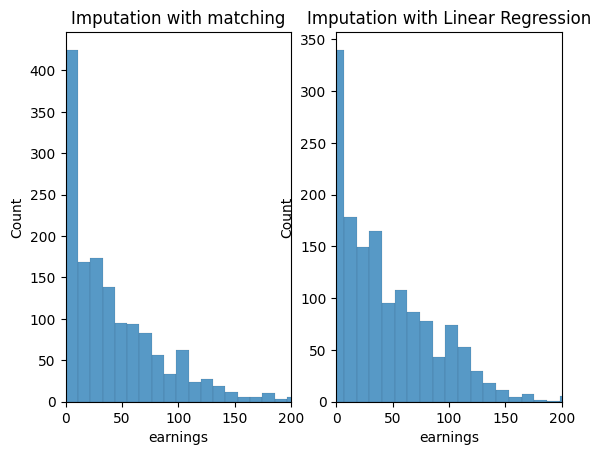

In [68]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
sns.histplot(df_earning_imputed_KNN["earnings"])
plt.title("Imputation with matching")
plt.xlim(0,200)
ax2 = fig.add_subplot(1,2,2)
plt.title("Imputation with Linear Regression")
sns.histplot(df["earnings"])
plt.xlim(0,200)

## Comment 
- The distribution is heavily right-skewed for matching.
- A high concentration of earnings values is near 0, with frequency quickly dropping off as earnings increase.
- This approach leads to a very large number of low-income values.
  Matching imputation tends to replicate patterns from similar observed units and may reinforce existing distribution biases.
  Linear regression imputation introduces a more continuous prediction based on covariates. It produce a broader distribution and potentially reducing clustering at the low end.

## Multiple variables imputation 

Let's move on to the case where multiple variables present missing values. 
To process we will introduce missing values in the age variable. 

* Write a function to cause approximatively 30% of the values of a variable x to be missing. Design the mechanism to be at random but not completely at random: the probability of missing age should depend on some y variable. 
* Apply the function to the age variable with a dependence on the sex.
* Explore the iterative imputer of scikit-learn.

In [51]:
## Your answer